 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [24]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [25]:
# Reading algorithmic returns
whalereturns = pd.read_csv("C:/Users/khanh/OneDrive/Desktop/Fintech and Blockchain Bootcamp/Week 4/Homework/Resources/whale_returns.csv",parse_dates=True, index_col="Date", infer_datetime_format=True)
whalereturns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [26]:
# Reading algorithmic returns
algoreturns = pd.read_csv("C:/Users/khanh/OneDrive/Desktop/Fintech and Blockchain Bootcamp/Week 4/Homework/Resources/algo_returns.csv",parse_dates=True, index_col="Date", infer_datetime_format=True)
algoreturns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [27]:
# Reading S&P TSX 60 Closing Prices
sptsx = pd.read_csv("C:/Users/khanh/OneDrive/Desktop/Fintech and Blockchain Bootcamp/Week 4/Homework/Resources/sp_tsx_history.csv",parse_dates=True, index_col="Date", infer_datetime_format=True)
sptsx

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [5]:
# Check Data Types
sptsx.dtypes

Close    object
dtype: object

In [28]:
# Fix Data Types
sptsx["Close"]=sptsx["Close"].apply(lambda x: x.replace(',','').replace('$',''))
sptsx["Close"]=sptsx["Close"].astype(float)

In [29]:
# Calculate Daily Returns
sptsx["TSX returns"]=sptsx["Close"].pct_change(1)
sptsx = sptsx.drop("Close",1)
sptsx

C:\Users\khanh\AppData\Local\Temp\ipykernel_26300\69491783.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sptsx = sptsx.drop("Close",1)


,TSX returns
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [30]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
mergedata = pd.merge(whalereturns, algoreturns, how="inner", left_on="Date", right_on="Date")
mergedata = pd.merge(mergedata, sptsx, how="inner", left_on="Date", right_on="Date")


In [31]:
# Drop nulls
mergedata = mergedata.dropna()
mergedata

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

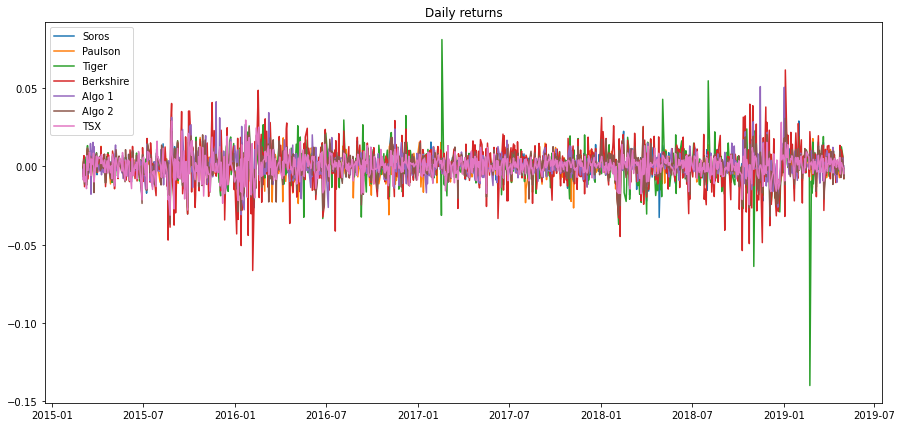

In [32]:
# Plot daily returns of all portfolios
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)
plt.plot (mergedata.index, mergedata['SOROS FUND MANAGEMENT LLC'], label="Soros")
plt.plot (mergedata.index, mergedata['PAULSON & CO.INC. '], label="Paulson")
plt.plot (mergedata.index, mergedata['TIGER GLOBAL MANAGEMENT LLC'], label="Tiger")
plt.plot (mergedata.index, mergedata['BERKSHIRE HATHAWAY INC'], label="Berkshire")
plt.plot (mergedata.index, mergedata['Algo 1'], label="Algo 1")
plt.plot (mergedata.index, mergedata['Algo 2'], label="Algo 2")
plt.plot (mergedata.index, mergedata['TSX returns'], label="TSX")
plt.title('Daily returns')
plt.legend()
plt.show()


#### Calculate and Plot cumulative returns.

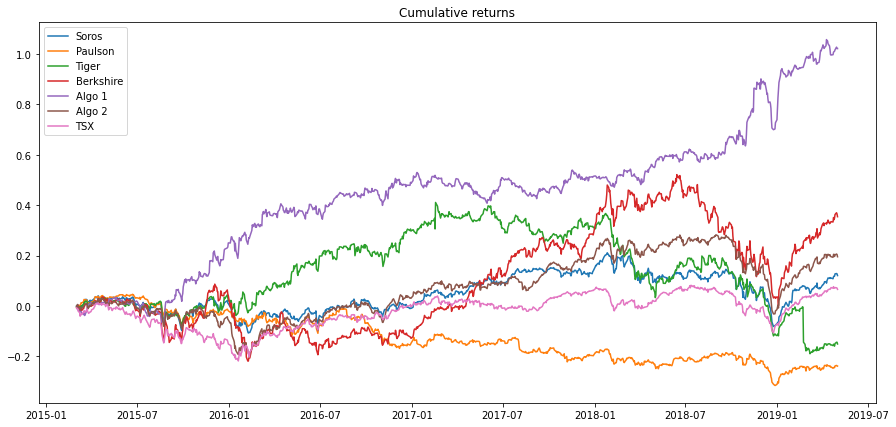

In [33]:
# Calculate cumulative returns of all portfolios
mergedata['Soros Cumulative Returns'] = (1 + mergedata["SOROS FUND MANAGEMENT LLC"]).cumprod() - 1
mergedata['PAULSON Cumulative Returns'] = (1 + mergedata["PAULSON & CO.INC. "]).cumprod() - 1
mergedata['TIGER Cumulative Returns'] = (1 + mergedata["TIGER GLOBAL MANAGEMENT LLC"]).cumprod() - 1
mergedata['Berkshire Cumulative Returns'] = (1 + mergedata["BERKSHIRE HATHAWAY INC"]).cumprod() - 1
mergedata['Algo 1 Cumulative Returns'] = (1 + mergedata["Algo 1"]).cumprod() - 1
mergedata['Algo 2 Cumulative Returns'] = (1 + mergedata["Algo 2"]).cumprod() - 1
mergedata['TSX Cumulative Returns'] = (1 + mergedata["TSX returns"]).cumprod() - 1
mergedata
# Plot cumulative returns
plt.rcParams["figure.figsize"] = (15,7)
plt.plot (mergedata.index, mergedata['Soros Cumulative Returns'], label="Soros")
plt.plot (mergedata.index, mergedata['PAULSON Cumulative Returns'], label="Paulson")
plt.plot (mergedata.index, mergedata['TIGER Cumulative Returns'], label="Tiger")
plt.plot (mergedata.index, mergedata['Berkshire Cumulative Returns'], label="Berkshire")
plt.plot (mergedata.index, mergedata['Algo 1 Cumulative Returns'], label="Algo 1")
plt.plot (mergedata.index, mergedata['Algo 2 Cumulative Returns'], label="Algo 2")
plt.plot (mergedata.index, mergedata['TSX Cumulative Returns'], label="TSX")
plt.title('Cumulative returns')
plt.legend()
plt.show()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


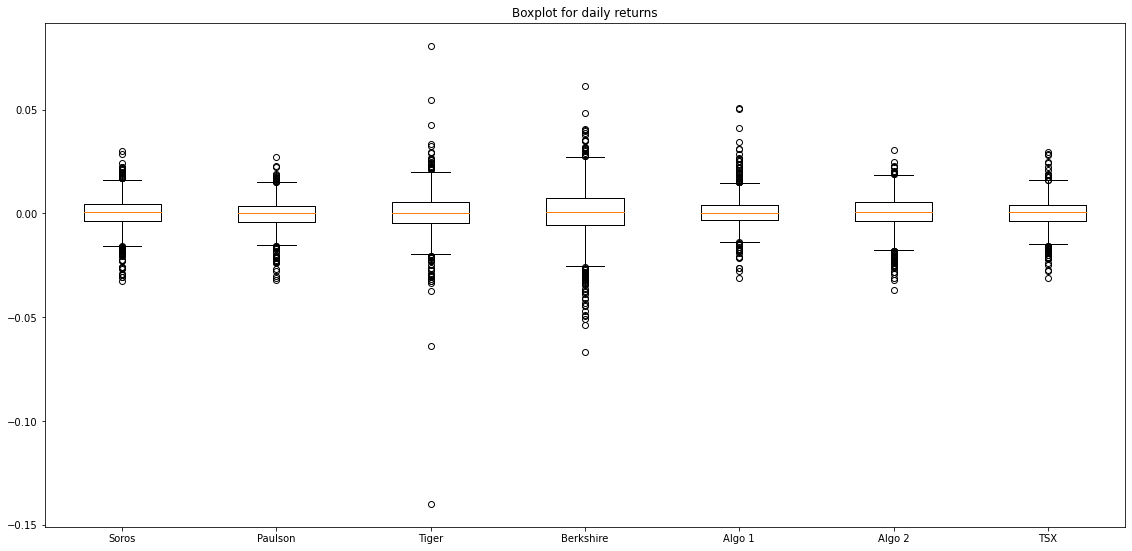

In [12]:
# Box plot to visually show risk
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(mergedata.iloc[:,0:7])
ax.set_xticklabels(['Soros','Paulson','Tiger','Berkshire','Algo 1','Algo 2','TSX'])
plt.title('Boxplot for daily returns')
plt.show()

### Calculate Standard Deviations

In [13]:
# Calculate the daily standard deviations of all portfolios
mergedata.iloc[:,0:7].std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
TSX returns                    0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [14]:
# Calculate  the daily standard deviation of S&P TSX 60
mergedata['TSX returns'].std()
# Determine which portfolios are riskier than the S&P TSX 60
mergedata.iloc[:,0:7].std() > mergedata['TSX returns'].std()

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
TSX returns                    False
dtype: bool

### Calculate the Annualized Standard Deviation

In [15]:
# Calculate the annualized standard deviation (252 trading days)
mergedata.iloc[:,0:7].std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
TSX returns                    0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

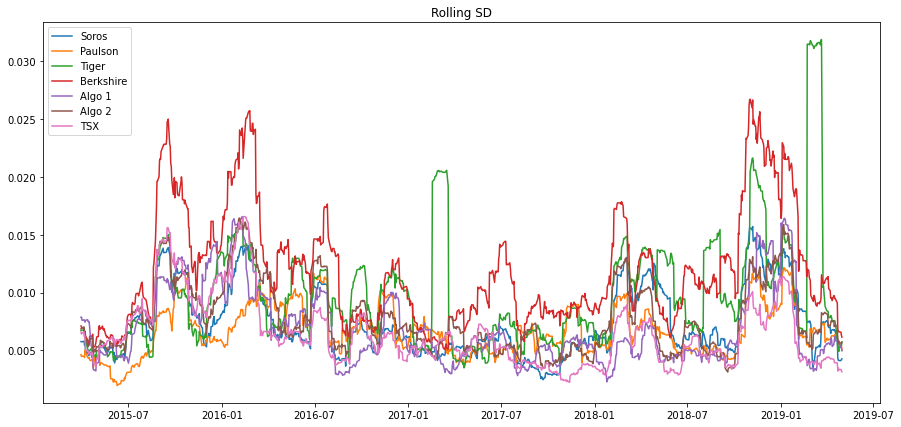

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
mergedata['Soros rolling SD'] = mergedata["SOROS FUND MANAGEMENT LLC"].rolling(21).std()
mergedata['PAULSON rolling SD'] = mergedata["PAULSON & CO.INC. "].rolling(21).std()
mergedata['TIGER rolling SD'] = mergedata["TIGER GLOBAL MANAGEMENT LLC"].rolling(21).std()
mergedata['Berkshire rolling SD'] = mergedata["BERKSHIRE HATHAWAY INC"].rolling(21).std()
mergedata['Algo 1 rolling SD'] = mergedata["Algo 1"].rolling(21).std()
mergedata['Algo 2 rolling SD'] = mergedata["Algo 2"].rolling(21).std()
mergedata['TSX rolling SD'] = mergedata["TSX returns"].rolling(21).std()
mergedata
# Plot the rolling standard deviation
plt.rcParams["figure.figsize"] = (15,7)
plt.plot (mergedata.index, mergedata['Soros rolling SD'], label="Soros")
plt.plot (mergedata.index, mergedata['PAULSON rolling SD'], label="Paulson")
plt.plot (mergedata.index, mergedata['TIGER rolling SD'], label="Tiger")
plt.plot (mergedata.index, mergedata['Berkshire rolling SD'], label="Berkshire")
plt.plot (mergedata.index, mergedata['Algo 1 rolling SD'], label="Algo 1")
plt.plot (mergedata.index, mergedata['Algo 2 rolling SD'], label="Algo 2")
plt.plot (mergedata.index, mergedata['TSX rolling SD'], label="TSX")
plt.title('Rolling SD')
plt.legend()
plt.show()

### Calculate and plot the correlation

In [17]:
# Calculate the correlation
# Display the correlation matrix
mergedata.iloc[:,0:7].corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

               Algo 2  TSX returns
Algo 2       0.000069     0.000043
TSX returns  0.000043     0.000049
0.8728267344999606


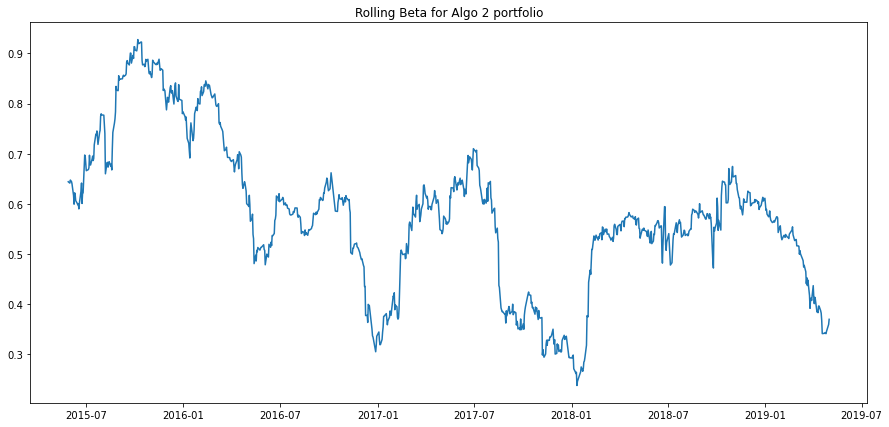

In [35]:
# Calculate covariance of a single portfolio
cov_matrix = mergedata.iloc[:, 5:7].cov()
# Calculate variance of S&P TSX
print(cov_matrix)
# Computing beta
beta = cov_matrix.iloc[0,1] / cov_matrix.iloc[1,1]
print(beta)

# create function to calculate rolling beta
from sklearn.linear_model import LinearRegression
def rolling_beta(X,Y,N):
    """ 
    X = The independent variable which is the TSX
    Y = The dependent variable which is the Portfolio
    N = The length of the Window (60)
    this function returns the alphas and the betas of the rolling regression
    """
     
    # all the observations
    obs = len(X)
     
    # initiate the betas with null values
    betas = np.full(obs, np.nan)
     
    # initiate the alphas with null values
    alphas = np.full(obs, np.nan)
     
    for i in range((obs-N)):
        regressor = LinearRegression()
        regressor.fit(X.to_numpy()[i : i + N+1].reshape(-1,1), Y.to_numpy()[i : i + N+1])
        betas[i+N] = regressor.coef_[0]
        alphas[i+N] = regressor.intercept_
 
    return(alphas, betas)

# call function to calculate rolling beta
alpha_beta = rolling_beta(mergedata['Algo 2'], mergedata['TSX returns'], 60)
alpha_beta = pd.DataFrame(list(zip(*alpha_beta)), columns = ['alpha', 'beta'])
alpha_beta

# Plot rolling beta trend
plt.rcParams["figure.figsize"] = (15,7)
plt.plot (mergedata.index, alpha_beta['beta'])
plt.title('Rolling Beta for Algo 2 portfolio')
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [36]:
# Use `ewm` to calculate the rolling window
mergedata["Exponentially Weighted Moving Average with Metric of Interest StD Algo 2 portfolio"] = mergedata["Algo 2"].ewm(span=21).std()
mergedata


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX returns,Soros Cumulative Returns,PAULSON Cumulative Returns,TIGER Cumulative Returns,...,Algo 2 Cumulative Returns,TSX Cumulative Returns,Soros rolling SD,PAULSON rolling SD,TIGER rolling SD,Berkshire rolling SD,Algo 1 rolling SD,Algo 2 rolling SD,TSX rolling SD,Exponentially Weighted Moving Average with Metric of Interest StD Algo 2 portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,-0.001266,-0.004981,-0.000496,...,-0.000949,-0.008530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.000962,-0.001755,-0.003028,...,0.001464,-0.011872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002380
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.004981,0.002314,-0.000681,...,0.005794,-0.010544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002645
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.002963,-0.001269,-0.009156,...,-0.005733,-0.020411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007399
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.002383,0.002951,-0.003367,...,-0.004437,-0.026832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.118163,-0.245179,-0.159728,...,0.196390,0.070504,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.006296
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.127275,-0.238264,-0.149346,...,0.202677,0.072916,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.006178
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.128689,-0.236192,-0.144029,...,0.206080,0.072071,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.005922


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [55]:
# Annualized Sharpe Ratios
RET = (1+mergedata.iloc[:,0:7].mean()) ** 252 - 1
# print(RET)
# Annualized SD
SD = mergedata.iloc[:,0:7].std() * np.sqrt(252)
# print(SD)
# Annualized Sharpe Ratios
SHARPE = RET / SD
print(SHARPE)

SOROS FUND MANAGEMENT LLC      0.261381
PAULSON & CO.INC.             -0.566547
TIGER GLOBAL MANAGEMENT LLC   -0.152897
BERKSHIRE HATHAWAY INC         0.506271
Algo 1                         1.643270
Algo 2                         0.423779
TSX returns                    0.265473
dtype: float64


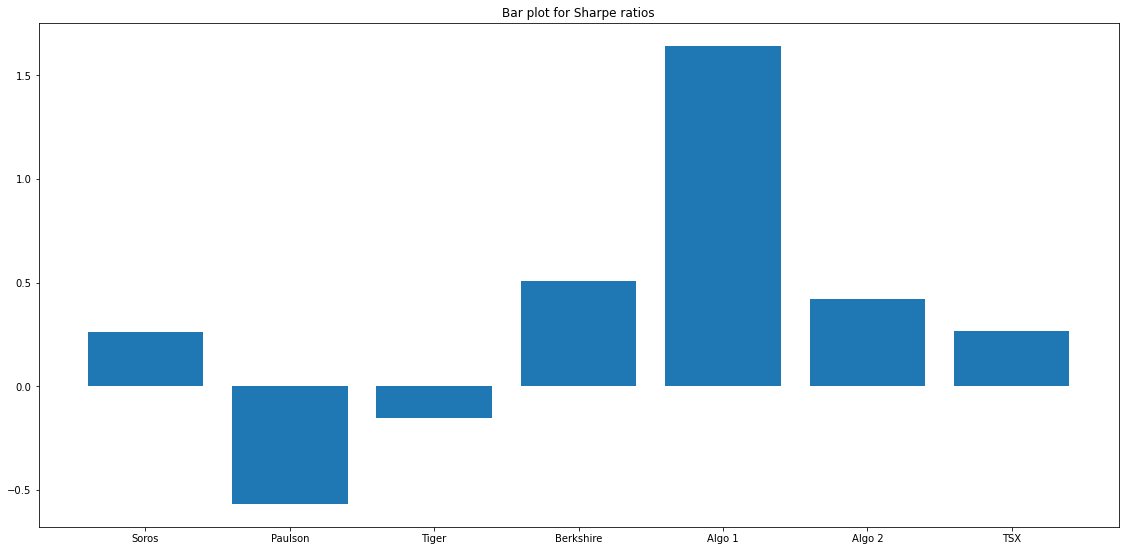

In [52]:
# Visualize the sharpe ratios as a bar plot
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(['Soros','Paulson','Tiger','Berkshire','Algo 1','Algo 2','TSX'], SHARPE)
plt.title('Bar plot for Sharpe ratios')
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
Algo 1 outperforms everything as it has the highest Sharpe ratio and therefore the highest risk-adjusted return. Algo 2 outperforms TSX and 3 out of the 4 whales portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [14]:
# install Yahoo Finance
!pip install yfinance
import yfinance as yf

In [20]:
# Reading data from 1st stock
BMO = yf.download("BMO.TO", start="2015-03-01", end="2019-05-01")
BMO = BMO.drop(["Open","Close","High","Low","Volume"],1)
BMO.columns = ['BMO']
BMO

[*********************100%***********************]  1 of 1 completed


C:\Users\khanh\AppData\Local\Temp\ipykernel_26300\2040060294.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  BMO = BMO.drop(["Open","Close","High","Low","Volume"],1)


,BMO
Date,
2015-03-02,57.460331
2015-03-03,56.693207
2015-03-04,56.804932
2015-03-05,56.827282
2015-03-06,56.648502
...,...
2019-04-24,91.873032
2019-04-25,91.846870
2019-04-26,92.152039


In [21]:
# Reading data from 2nd stock
ENB = yf.download("ENB.TO", start="2015-03-01", end="2019-05-01")
ENB = ENB.drop(["Open","Close","High","Low","Volume"],1)
ENB.columns = ['ENB']
ENB

[*********************100%***********************]  1 of 1 completed


C:\Users\khanh\AppData\Local\Temp\ipykernel_26300\2388914991.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ENB = ENB.drop(["Open","Close","High","Low","Volume"],1)


,ENB
Date,
2015-03-02,38.720364
2015-03-03,38.560589
2015-03-04,38.274303
2015-03-05,38.660450
2015-03-06,39.312893
...,...
2019-04-24,41.102558
2019-04-25,41.102558
2019-04-26,40.482594


In [22]:
# Reading data from 3rd stock
L = yf.download("L.TO", start="2015-03-01", end="2019-05-01")
L = L.drop(["Open","Close","High","Low","Volume"],1)
L.columns = ['L']
L

[*********************100%***********************]  1 of 1 completed


C:\Users\khanh\AppData\Local\Temp\ipykernel_26300\128273381.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  L = L.drop(["Open","Close","High","Low","Volume"],1)


,L
Date,
2015-03-02,44.430176
2015-03-03,43.961678
2015-03-04,44.494080
2015-03-05,44.195934
2015-03-06,43.670643
...,...
2019-04-24,61.309460
2019-04-25,61.763054
2019-04-26,61.536266


In [38]:
# Combine all stocks in a single DataFrame
Custom = pd.merge(BMO, ENB, how="inner", left_on="Date", right_on="Date")
Custom = pd.merge(Custom, L, how="inner", left_on="Date", right_on="Date")
Custom

,BMO,ENB,L
Date,,,
2015-03-02,57.460331,38.720364,44.430176
2015-03-03,56.693207,38.560589,43.961678
2015-03-04,56.804932,38.274303,44.494080
2015-03-05,56.827282,38.660450,44.195934
2015-03-06,56.648502,39.312893,43.670643
...,...,...,...
2019-04-24,91.873032,41.102558,61.309460
2019-04-25,91.846870,41.102558,61.763054
2019-04-26,92.152039,40.482594,61.536266


In [39]:
# Create portfolio prices
Custom['Portfolio Price'] = Custom['BMO'] + Custom['ENB'] + Custom['L']
Custom

,BMO,ENB,L,Portfolio Price
Date,,,,
2015-03-02,57.460331,38.720364,44.430176,140.610870
2015-03-03,56.693207,38.560589,43.961678,139.215473
2015-03-04,56.804932,38.274303,44.494080,139.573315
2015-03-05,56.827282,38.660450,44.195934,139.683666
2015-03-06,56.648502,39.312893,43.670643,139.632038
...,...,...,...,...
2019-04-24,91.873032,41.102558,61.309460,194.285049
2019-04-25,91.846870,41.102558,61.763054,194.712482
2019-04-26,92.152039,40.482594,61.536266,194.170898


In [41]:
# Calculate Daily Returns
Custom["Portfolio returns"] = Custom["Portfolio Price"].pct_change(1)
Custom = Custom.drop(["BMO","ENB","L","Portfolio Price"],1)

# Display sample data
Custom

C:\Users\khanh\AppData\Local\Temp\ipykernel_26300\2709215518.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Custom = Custom.drop(["BMO","ENB","L","Portfolio Price"],1)


,Portfolio returns
Date,
2015-03-02,NaN
2015-03-03,-0.009924
2015-03-04,0.002570
2015-03-05,0.000791
2015-03-06,-0.000370
...,...
2019-04-24,-0.005057
2019-04-25,0.002200
2019-04-26,-0.002781


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Join your returns DataFrame to the original returns DataFrame
mergedata = pd.merge(mergedata, Custom, how="inner", left_on="Date", right_on="Date")


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
mergedata = mergedata.dropna()
mergedata

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX returns,Soros Cumulative Returns,PAULSON Cumulative Returns,TIGER Cumulative Returns,...,TSX Cumulative Returns,Soros rolling SD,PAULSON rolling SD,TIGER rolling SD,Berkshire rolling SD,Algo 1 rolling SD,Algo 2 rolling SD,TSX rolling SD,Exponentially Weighted Moving Average with Metric of Interest StD Algo 2 portfolio,Portfolio returns
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,-0.005445,-0.003021,-0.003968,0.001858,0.002325,-0.003281,-0.000399,0.017207,0.011306,0.009419,...,-0.023690,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.006583,0.007030,0.002956
2015-04-01,0.000919,0.000157,-0.002002,-0.003865,-0.002956,0.003005,0.002692,0.018141,0.011464,0.007399,...,-0.021063,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.006404,0.006712,-0.003555
2015-04-02,0.002561,0.004299,0.003058,0.001966,0.000881,0.004874,0.005626,0.020749,0.015812,0.010479,...,-0.015555,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.006509,0.006506,0.011614
2015-04-06,0.005368,0.003763,0.004631,0.004920,-0.003298,0.006362,0.004927,0.026228,0.019635,0.015159,...,-0.010705,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.006596,0.006396,0.005118
2015-04-07,-0.001243,-0.000171,-0.002060,0.001882,0.001992,-0.002593,0.005840,0.024953,0.019460,0.013068,...,-0.004927,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.006295,0.006190,0.011640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,0.118481,-0.244203,-0.155375,...,0.071176,0.004143,0.005695,0.005088,0.006653,0.005889,0.005531,0.003468,0.006084,-0.005057
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.118163,-0.245179,-0.159728,...,0.070504,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.006296,0.002200
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.127275,-0.238264,-0.149346,...,0.072916,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.006178,-0.002781


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
mergedata['Portfolio returns'].std() * np.sqrt(252)


0.11640606199656627

### Calculate and plot rolling `std` with 21-day window

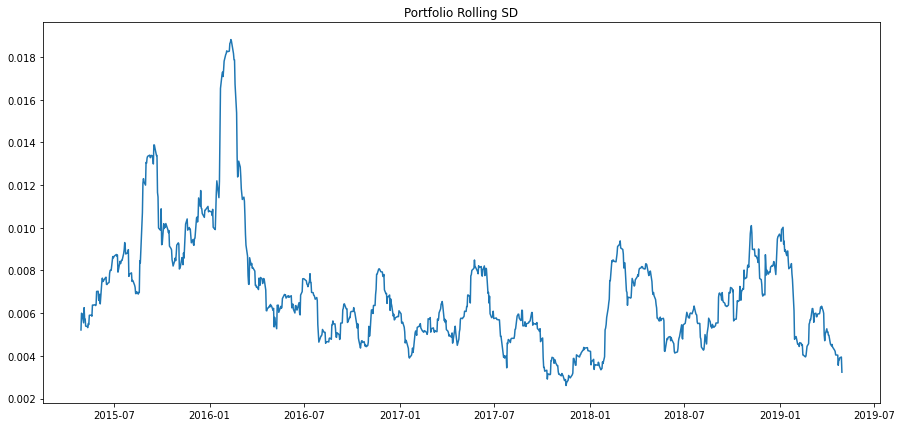

In [45]:
# Calculate rolling standard deviation
mergedata['Portfolio rolling SD'] = mergedata["Portfolio returns"].rolling(21).std()
mergedata

# Plot the rolling standard deviation
plt.rcParams["figure.figsize"] = (15,7)
plt.plot (mergedata.index, mergedata['Portfolio rolling SD'])
plt.title('Portfolio Rolling SD')
plt.show()

### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation
mergedata[['Portfolio returns','TSX returns']].corr()

,Portfolio returns,TSX returns
Portfolio returns,1.00000,0.78471
TSX returns,0.78471,1.00000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

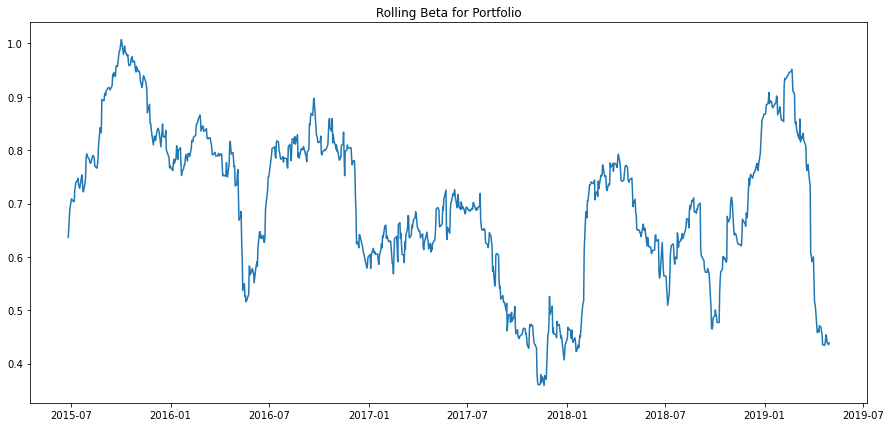

In [48]:
# Calculate and plot Beta
# call function to calculate rolling beta
alpha_beta = rolling_beta(mergedata['Portfolio returns'], mergedata['TSX returns'], 60)
alpha_beta = pd.DataFrame(list(zip(*alpha_beta)), columns = ['alpha', 'beta'])
alpha_beta

# Plot rolling beta trend
plt.rcParams["figure.figsize"] = (15,7)
plt.plot (mergedata.index, alpha_beta['beta'])
plt.title('Rolling Beta for Portfolio')
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratios
RET = (1+mergedata.iloc[:,[0,1,2,3,4,5,6,22]].mean()) ** 252 - 1
# print(RET)
# Annualized SD
SD = mergedata.iloc[:,[0,1,2,3,4,5,6,22]].std() * np.sqrt(252)
# print(SD)
# Annualized Sharpe Ratios
SHARPE = RET / SD
print(SHARPE)

SOROS FUND MANAGEMENT LLC      0.261381
PAULSON & CO.INC.             -0.566547
TIGER GLOBAL MANAGEMENT LLC   -0.152897
BERKSHIRE HATHAWAY INC         0.506271
Algo 1                         1.643270
Algo 2                         0.423779
TSX returns                    0.265473
Portfolio returns              0.824988
dtype: float64


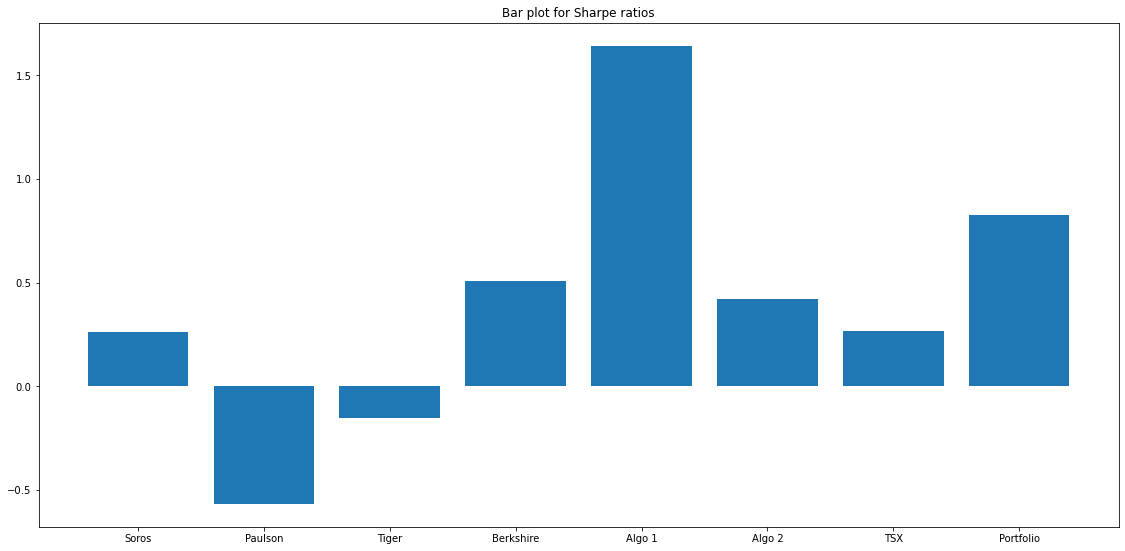

In [66]:
# Visualize the sharpe ratios as a bar plot
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(['Soros','Paulson','Tiger','Berkshire','Algo 1','Algo 2','TSX','Portfolio'], SHARPE)
plt.title('Bar plot for Sharpe ratios')
plt.show()

### How does your portfolio do?

Write your answer here!

In [ ]:
Our custom portfolio is the 2nd highest performer among all the portfolios, exceeded only by Algo 1. It outperforms the TSX, Algo 2 and all the whale portfolios